In [41]:
from bestDays import *
from planner import geraDocx

## 1. Visualização dos capítulos e números de páginas

In [42]:
pages, titles = chaptersWithPages("cap.txt")

caps = [i for i in range(0,len(titles))]

zipped = zip(caps, pages)

In [43]:
pages, titles

([4, 6, 11, 6, 7, 12, 5, 6, 7, 24, 7, 19, 11, 14, 4],
 ['Prefácio',
  'Um',
  'Dois',
  'Três',
  'Quatro',
  'Cinco',
  'Seis',
  'Sete',
  'Oito',
  'Nove',
  'Dez',
  'Onze',
  'Doze',
  'Treze',
  'Quatorze'])

In [44]:
number_of_days = 15

## 2.1. Solução com escolha dinâmica dos parâmetros

In [19]:
number_of_cycles = 15
parametros, best_fit, individuals, inf_graph = the_best(number_of_days, number_of_cycles)

g, n, k, m, e = parametros

print("Fui escolhido com ", str(best_fit)+" de fitness")
print(parametros)

Encontrei: 1 [79, 79, 2, 0.9212128650296278, True] 23.410000000000004


KeyboardInterrupt: 

## 2.2. Solução com os parêmetros definidos pelo usuário

In [45]:
#Maiores
#individuals, inf_graph = run_ga(70, 92, 5, 0.8691350183172188, True, number_of_days, True)

#Menores
individuals, inf_graph = run_ga(112, 76, 4, 0.9204600515954271, True, number_of_days, True)

#Bíblia
#individuals, inf_graph = run_ga(94, 85, 3, 0.9758877342608199, True, number_of_days, True)

best_fit = evaluate(individuals)
print("Fitness", best_fit)

Fitness 31.182222222222222


## 2.3. Visualização da solução utilizada

### Gráfico do algoritmo genético

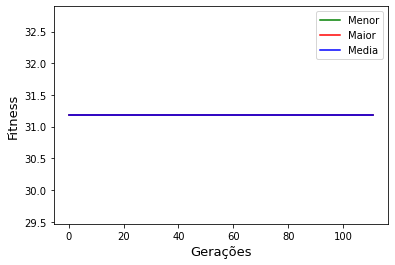

In [46]:
import numpy as np
import matplotlib.pyplot as plt

max_fit = inf_graph[0]
min_fit = inf_graph[1]
avarage_fit = inf_graph[2]
n_range = inf_graph[3]
x = np.arange(0, n_range)

plt.figure(figsize=(6, 4))
plt.plot(x, min_fit, color='green', label='Menor') 
plt.plot(x, max_fit, color='red', label='Maior')
plt.plot(x, avarage_fit, color='blue', label='Media')

plt.xlabel("Gerações",fontsize=13)
plt.ylabel("Fitness",fontsize=13)

plt.legend()
plt.show()
plt.close()

### Visualização do resultado com o número do capítulo por dia + número de páginas por dia

In [47]:
zipped = zip(individuals[0], individuals[1])
print("Fitness", best_fit)
for day_pages in list(zipped):
    print(day_pages)

Fitness 31.182222222222222
(0, 4)
(1, 6)
(2, 11)
(3, 6)
(4, 7)
(5, 12)
(6, 5)
(7, 6)
(8, 7)
(9, 24)
(10, 7)
(11, 19)
(12, 11)
(13, 14)
(14, 4)


### Visualização do resultado com o nome dos capítulos por dia + número de páginas por dia

In [48]:
zipped = zip(individuals[0], individuals[1])

for day_pages in list(zipped):
    if(day_pages[1] == NO_PAGE):
        break
        
    if(not isinstance(day_pages[0], list)):
        print(titles[day_pages[0]], "|", day_pages[1])
    else:
        for cap in day_pages[0]:
            print(titles[cap], end=' | ')
        print(day_pages[1])
        print("")

Prefácio | 4
Um | 6
Dois | 11
Três | 6
Quatro | 7
Cinco | 12
Seis | 5
Sete | 6
Oito | 7
Nove | 24
Dez | 7
Onze | 19
Doze | 11
Treze | 14
Quatorze | 4


## 3. Geração do calendário

### 3.1 Lista gerada pelo Algoritmo Genético

In [49]:
import pprint

In [50]:
CAP = 0
PAGES = 1
MAX_CAPS_DAY = 10

zipped = zip(individuals[0], individuals[1])
extra_days = number_of_days - (len(individuals[0]) - 1)
print(extra_days)
capitulos_divididos = []

#Gera a lista com a divisão geraada pelo algoritmo genético
for day_pages in list(zipped):
    #Se não há capítulo no dia, então já adicionou todos
    if(day_pages[1] == NO_PAGE):
        break
    
    #Gera a string da meta do dia
    if(not isinstance(day_pages[0], list)):
        final_title = [titles[day_pages[CAP]]]
    else:
        final_title = []
        for cap in day_pages[0]:
            final_title += [ titles[cap]]
    
    #Adiciona a meta na listaa
    capitulos_divididos.append([final_title, day_pages[PAGES]])
    
pprint.pprint(capitulos_divididos)

1
[[['Prefácio'], 4],
 [['Um'], 6],
 [['Dois'], 11],
 [['Três'], 6],
 [['Quatro'], 7],
 [['Cinco'], 12],
 [['Seis'], 5],
 [['Sete'], 6],
 [['Oito'], 7],
 [['Nove'], 24],
 [['Dez'], 7],
 [['Onze'], 19],
 [['Doze'], 11],
 [['Treze'], 14],
 [['Quatorze'], 4]]


### 3.2 Divide as metas no dias que sobraram

In [51]:
TITULO = 0
CAPITULOS = 1
seta = "↑"

#Dias sem capítulos
extra_days = number_of_days - (len(capitulos_divididos))

#Lista para calcular  quantidade de páginasa 
capitulos_calculo = copy.deepcopy(capitulos_divididos)

while(extra_days > 0):
    #Lista com o número de capítulos
    caps = [cap[CAPITULOS] for cap in capitulos_calculo] 
    
    #Maior quantidade de páginas e o idx do capítulo
    max_cap = max(caps)
    max_idx = caps.index(max(caps))

    extra_days -=1
    
    #Informações do capítulo e divisão
    titulo = capitulos_calculo[max_idx][TITULO]
    capitulos_calculo[max_idx][CAPITULOS] = capitulos_calculo[max_idx][CAPITULOS]/2
    
    #Insere a divisão
    capitulos_calculo.insert(max_idx+1, [titulo, capitulos_calculo[max_idx][CAPITULOS]])
    capitulos_divididos.insert(max_idx+1, [titulo, seta])

In [52]:
#Divisão com número de páginas
pprint.pprint(capitulos_calculo)

[[['Prefácio'], 4],
 [['Um'], 6],
 [['Dois'], 11],
 [['Três'], 6],
 [['Quatro'], 7],
 [['Cinco'], 12],
 [['Seis'], 5],
 [['Sete'], 6],
 [['Oito'], 7],
 [['Nove'], 24],
 [['Dez'], 7],
 [['Onze'], 19],
 [['Doze'], 11],
 [['Treze'], 14],
 [['Quatorze'], 4]]


In [53]:
#Divisão com seta nos dias extraas
pprint.pprint(capitulos_divididos)

[[['Prefácio'], 4],
 [['Um'], 6],
 [['Dois'], 11],
 [['Três'], 6],
 [['Quatro'], 7],
 [['Cinco'], 12],
 [['Seis'], 5],
 [['Sete'], 6],
 [['Oito'], 7],
 [['Nove'], 24],
 [['Dez'], 7],
 [['Onze'], 19],
 [['Doze'], 11],
 [['Treze'], 14],
 [['Quatorze'], 4]]


### 3.3 Gera o arquivo do calendário

**Hiperparâmetros**

In [59]:
title = "O grande divórcio"
file_name = f"Planner - {title}"
author = "C. S. Lewis"
weekendMessage = "Respiro"
caps_file_name = "readme.txt"
skipWeekend = True
start_day = 3
start_month = 4
start_year = 2023
showNumberPages = True

**Lista para o calendário**

In [60]:
if showNumberPages:
    string_list_capitulos = [[" | ".join(capitulo[TITULO]), str(capitulo[CAPITULOS])] for capitulo in capitulos_divididos]
    capitulos_divididos_string = [" | ".join(capitulo) + "\n" for capitulo in string_list_capitulos]
else:
    capitulos_divididos_string = [" | ".join(capitulo[TITULO]) + "\n" for capitulo in capitulos_divididos]

In [61]:
capitulos_divididos_string

['Prefácio | 4\n',
 'Um | 6\n',
 'Dois | 11\n',
 'Três | 6\n',
 'Quatro | 7\n',
 'Cinco | 12\n',
 'Seis | 5\n',
 'Sete | 6\n',
 'Oito | 7\n',
 'Nove | 24\n',
 'Dez | 7\n',
 'Onze | 19\n',
 'Doze | 11\n',
 'Treze | 14\n',
 'Quatorze | 4\n']

In [62]:
with open('readme.txt', 'w', encoding='utf-8') as f:
    f.writelines(capitulos_divididos_string)
f.close()

**Gera o calendário**

In [63]:
geraDocx(file_name, title, author, weekendMessage, caps_file_name, skipWeekend, start_day, start_month, start_year)